# Метод ближайших соседей

В данной работе реализован метод ближайших соседей, который предсказывает вероятность потребления алкоголя студентом из представленных характеристик в данном датасете:

    https://www.kaggle.com/uciml/student-alcohol-consumption

Цель работы: Найти закономерность между данными характеристиками, чтобы прогнозировать вероятность потребления алкоголя студентом.

Импортируем следующие библиотеки: umpy, pandas, и scikit-learn, также matplotlib и seaborn для визуализации данных.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

Установим дополнительные опции для работы с данными.

In [2]:
# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 30)
# Set default font size
plt.rcParams['font.size'] = 24
sns.set(font_scale=2)

Откроем файл с Датасетом для чтения данных из таблицы.

In [3]:
data = pd.read_csv("/home/akimg/Myprojects/ML_NeighborsClassifier-master/lab1/dataset/student-mat.csv")

Отобразим тип данных для каждого столбца и количества не пропущенных значений. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

Исходя из названия и описания колонок в таблице, можно отсеить те, что не представляют для нашего прогнозирования интереса. ОПИСАТЬ КАКИЕ НУЖНЫ

Преобразуем столбцы с числами в числовые типы данных, а столбцы, которые содержат бинарные типы данных в виде строки, заменим числами и приведем к числовому типу.

In [5]:
booles = {'no': 0, 'yes': 1}

for col in list(data.columns):
    if ('Medu' in col or 'Fedu' in col or 'studytime' in col
            or 'G1' in col or 'G2' in col or 'G3' in col):
        data[col] = data[col].astype(int)
    elif 'paid' in col or 'higher' in col or 'internet' in col:
        data[col].replace(booles, inplace=True)
        data[col] = data[col].astype(int)
    else: continue

Подсчитаем  далее возьмем модуль от неё, установим размер для картинки и выведем результат.

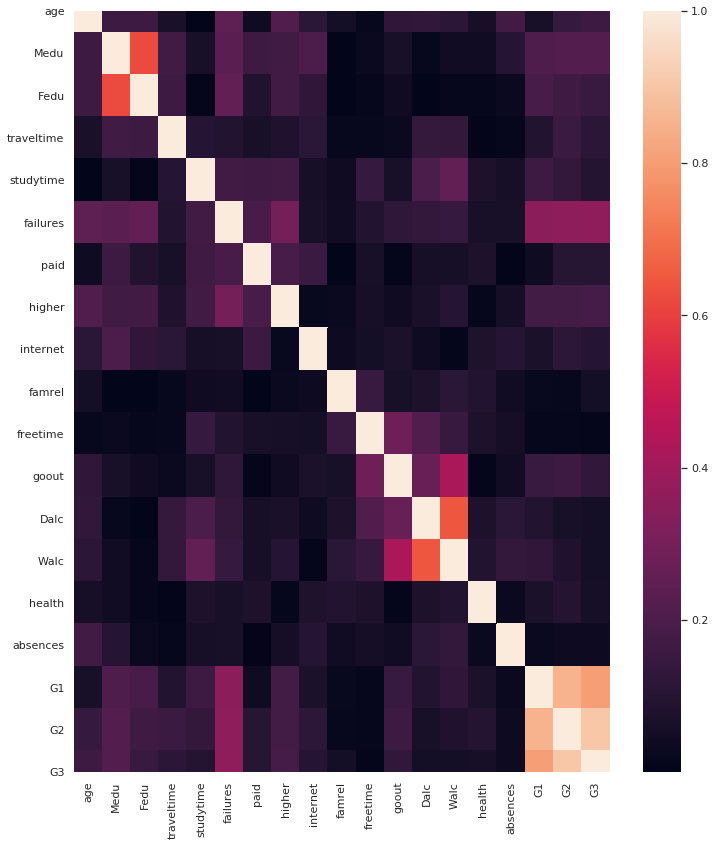

In [7]:
corr = data.corr().abs()
sns.set(rc={'figure.figsize':(12, 14)})

sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

Text(0.5, 1.0, 'Time of study')

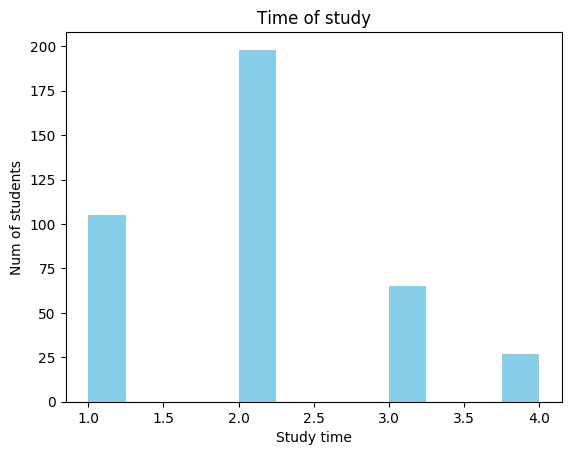

In [8]:
plt.style.use('mpl20')
plt.hist(data['studytime'].dropna(), bins=12, color='skyblue')
plt.xlabel('Study time')
plt.ylabel('Num of students')
plt.title('Time of study')

Далее я удалил коррелирующие колонки из таблицы, а так же таблицы, которые не представляют ценности в качестве характеристик.

In [9]:
extra_columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Mjob',
                 'Fjob', 'guardian', 'reason', 'guardian', 'traveltime', 'failures',
                 'schoolsup', 'famsup', 'activities', 'nursery', 'romantic',
                 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
data = data.drop(columns=list(extra_columns))

# Machine Learning

Выделим в нашей выборке целевую переменную, а также разделим ее на тренировочную и тестовую.

In [19]:
X = data[data.columns[:-1]]
y = data['studytime']
X_train, X_test, y_train, y_test = train_test_split(X, y)

Посмотрим, как влияет гиперпараметр на качество классификации.

In [20]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6464646464646465

Создадим пустой словарь. Будем добавлять в него значения наших "скоров". Ключами будет значение гиперпараметра, значениями - качество работы. Рассмотрим отдельно качество на тренировочной выборке и на тестовой.

In [12]:
train_scores = {}
test_scores = {}

for n in range(1, 41):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    current_train_score = clf.score(X_train, y_train)
    current_test_score = clf.score(X_test, y_test)
    train_scores[n] = current_train_score
    test_scores[n] = current_test_score

Выведим результат работы скрипта.

In [1]:
plt.plot(train_scores.keys(), train_scores.values(), label='Обучающая выборка')
plt.plot(test_scores.keys(), test_scores.values(), label='Тестовая выборка')
plt.xlabel('Количество соседей')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

NameError: name 'plt' is not defined